# 1 Chemical composition of pottery
>You work for a pottery manufacturing company that produces two different types of products A and B. Product A uses raw material from Llanedyrn and Product B uses raw material from
Isle Thorns and Ashley Rails. Your company is informed that Llanedyrn will be closing soon for maintenance and your entire production of product A is at risk.

>You received a potential new source of raw material from site Caldicot and you analyzed two samples to compare them to your existing samples from the other three sites. As the new data scientist of the company you are asked to look into the data and give your recommendation regarding the suitability of raw material from Caldicot as a replacement for Llanedyrn.


>The ask "look into the data" normally calls for an unsupervised learning exercise, since there is no clear output you are asked to predict. You will investigate the multivariate chemical composition of the raw material from four different sources using Principal Component Analysis.


##1.1 Data exploration with PCA
> 1. Import and view the data. How many columns do you have? Which columns will you use in your PCA?

The data has 7 columns. I will use the columns named "Al", "Fe", "Mg", "Ca", "Na".

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

In [53]:
#import and view the data
pottery = pd.read_csv('Pottery.csv')
pottery

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [12]:
#number of columns
print(f"There are {pottery.shape[1]} columns")

There are 7 columns


>2. Pre-process the data and perform PCA with 3 PCs.

In [28]:
#create new index with the format of site+number
index = pottery.index.astype(str)
new_index = [a + b for a, b in zip(pottery.Site, index)]
#reindex
pottery = pd.DataFrame(pottery.values, index = new_index, columns = pottery.columns)
#drop the column "Unnamed: 0", "Site"
pottery = pottery.drop(["Unnamed: 0", "Site"], axis = 1)
pottery.head()

,Al,Fe,Mg,Ca,Na
Llanedyrn0,14.4,7,4.3,0.15,0.51
Llanedyrn1,13.8,7.08,3.43,0.12,0.17
Llanedyrn2,14.6,7.09,3.88,0.13,0.2
Llanedyrn3,11.5,6.37,5.64,0.16,0.14
Llanedyrn4,13.8,7.06,5.34,0.2,0.2


In [29]:
#scale the data
scaler = StandardScaler()
pottery_scaled = scaler.fit_transform(pottery)

In [32]:
#perform PCA with 3PCs
pca = PCA(n_components=3, svd_solver='full')
pca_scores = pca.fit_transform(pottery_scaled)
scores_pd = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3'], index = pottery.index)
loadings_pd = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = pottery.columns)

> 3. Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe?

The first 2 components describe 89.73213663789889 percent of the variance.


The first 3 components describe 94.61598027980749 percent of the variance.

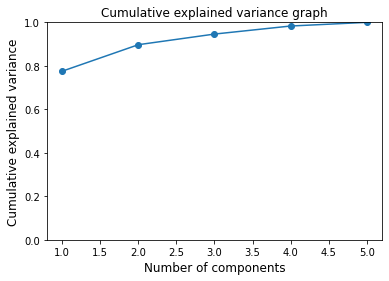

In [39]:
#plot the cumulative explained variance graph
pca_all = PCA(n_components=5, svd_solver='full')
pca_all.fit(pottery_scaled)
plt.plot(range(1,pca_all.n_components+1), np.cumsum(pca_all.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.title('Cumulative explained variance graph')
plt.tick_params(labelsize=10)
plt.ylim(0,1)
plt.show()

In [40]:
#percent of the variance
print(f"The first 2 components describe {sum(pca_all.explained_variance_ratio_[:2])*100} percent of the variance")
print(f"The first 3 components describe {sum(pca_all.explained_variance_ratio_[:3])*100} percent of the variance")

The first 2 components describe 89.73213663789889 percent of the variance
The first 3 components describe 94.61598027980749 percent of the variance


> 4. Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a different colour or symbol.

In [50]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)

    # Visualize the different sites with a different colour and symbol
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        if 'AshleyRails' in label:
            plt.text(x, y, 'A', ha='center', size=12, color = 'g')
        elif 'Caldicot' in label:
            plt.text(x, y, 'C', ha='center', size=12, color = 'gold')
        elif 'IsleThorns' in label:
            plt.text(x, y, 'IT', ha='center', size=12, color = 'b')
        else:
            plt.text(x, y, 'L', ha='center', size=12, color = 'red')

    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'black',alpha = 0.5)
        plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'black', ha = 'center', va = 'center', size=15)

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=15);
    plt.ylabel("PC{}".format(2), fontsize=15);
    plt.tick_params(labelsize=12)
    plt.grid()

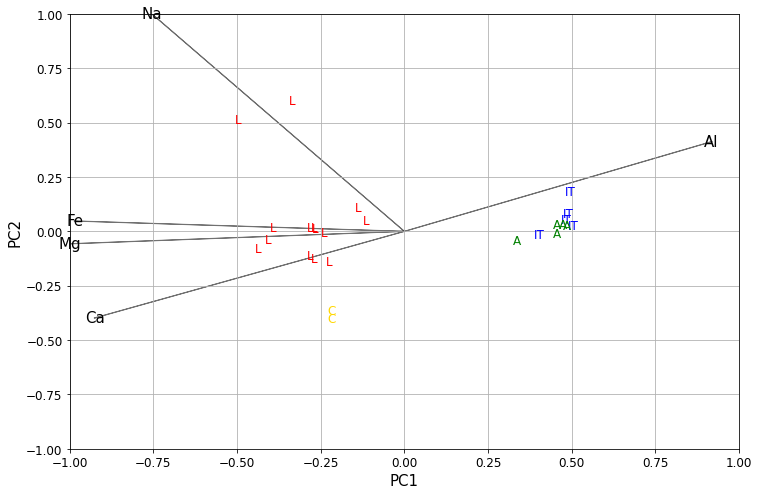

In [51]:
plt.rcParams["figure.figsize"] = [12,8]
myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

> 5. How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

As shown in the map, samples from Isle Thorns and Ashley Rails cluster together, which indicates that they all have similar properties. They both contain a high concentration of Al and a low concentration of Ca, Mg, Fe.

> 6. Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?

No. Raw material from Caldicot is not a good replacement for Llanedyrn. Samples from Caldicot are close to some samples from Llanedyrn. Two samples in the top left show a high concentration of Na, the rest show an above-average concentration of Na, but the samples from Caldicot have an average concentration of Na.

> 7. What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?


The first cluster including samples from Isle Thorns and Ashley Rails contain a high concentration of Al, a low concentration of Ca, Mg, Fe, Na. The other cluster including samples from Llanedyrn has a high concentration of Ca, Mg, Fe, Na, a low concentration of Al.


The samples from Llanedyrn have an above-average concentration of Na, but the samples from Caldicot have approximately average concentration of Na. 


> 8. Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

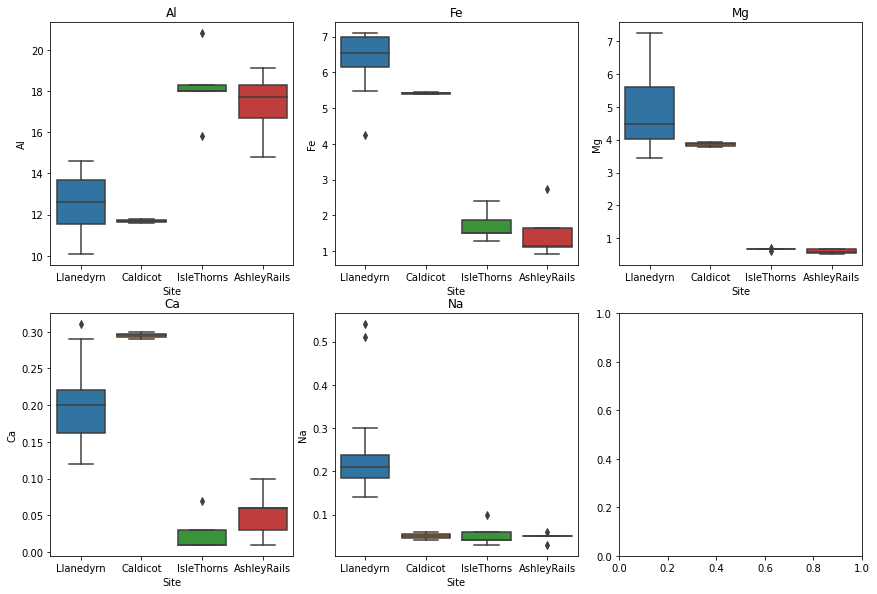

In [68]:
f, axes = plt.subplots(2, 3)
f.tight_layout()
sns.boxplot(y="Al", x= "Site", data=pottery,  orient='v', ax=axes[0,0]).set(title='Al')
sns.boxplot(y="Fe", x= "Site", data=pottery,  orient='v', ax=axes[0,1]).set(title='Fe')
sns.boxplot(y="Mg", x= "Site", data=pottery,  orient='v', ax=axes[0,2]).set(title='Mg')
sns.boxplot(y="Ca", x= "Site", data=pottery,  orient='v', ax=axes[1,0]).set(title='Ca')
sns.boxplot(y="Na", x= "Site", data=pottery,  orient='v', ax=axes[1,1]).set(title='Na')
plt.subplots_adjust(hspace = 0.2)
plt.show()